In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import figure
from sklearn import preprocessing
from pylab import savefig



In [2]:
cd /Users/mihaelanemes/Desktop/s2ds/data/Data/

/Users/mihaelanemes/Desktop/s2ds/data/Data


In [5]:
# read csv file - note all data is for Wales only

food_and_you_wales = pd.read_csv("food_and_you_all_waves_wales.csv")

# remove values that are 'refused to answer', 'unknown' etc as nan

food_and_you_wales = food_and_you_wales.replace ([-9, -8, -1, 98], np.nan)   

# replace 'not applicable' in specific columns

cols = ['q4_1_4', 'q4_1_5a', 'Q4_1_5_comb', 'q4_1_6', 'q4_1_7', 'q4_1_8a', 'q4_1_8b', 'sanspray', 'q4_1_11',
        'q4_1_12', 'q4_1_13', 'q4_1_14', 'q4_1_15', 'q4_1_16', 'q4_1_17', 'q4_1_18', 'q4_1_19']

food_and_you_wales[cols] = food_and_you_wales[cols].replace([5], np.nan)


# read census file - includes wales and england

census_2011_wales = pd.read_csv("microdata_census2011_wales.csv")

# keep only wales data encoded with no 2 in the 'country' column

census_2011_wales = census_2011_wales[census_2011_wales.country != 1]

In [8]:
# create new dataframes where we select only the data for comparison 

fnu_select = food_and_you_wales[['surveyyear','age_dv', 'marstat2', 'religion_dv', 'RespSex',
                                'wimd_2014_quintile', 'workstat2', 'Q6_1']]
census_select = census_2011_wales[['age', 'marstat', 'religionew', 'sex', 'deprived', 'ecopuk', 'health']]

##################

# structure and code response options for both files according to the F&U 

# drop all rows with answers from people below 16 yo

age_out_of_range_index = census_select[ (census_select['age'] < 16)].index
census_select.drop (age_out_of_range_index, inplace = True)

# group ages by age group 

census_select["age_dv"] = pd.cut (census_select.age, bins = [15,24,34,44,54,64,74,110], labels = [1,2,3,4,5,6,7])

# group marital status 

mart_stat = census_select["marstat"].replace({1:'A', 2:'B', 3:'B', 4:'A', 5:'A', 6:'A'})
mart_stat = mart_stat.replace({'B':1, 'A':2})
census_select = census_select.assign (marstat2 = mart_stat)

# group religion

religion_new = census_select["religionew"].replace({1:'A', 2:'B', 3:'C', 4:'C', 5:'C', 6:'C', 
                                                    7:'C', 8:'C', -9: np.nan,  9: np.nan})
religion_new = religion_new.replace({'A':3, 'B':1, 'C':2})
census_select = census_select.assign (religion_dv = religion_new)

# group work status 

work_stat = census_select['ecopuk'].replace({1:'A', 2:'A', 3:'A', 4:'A', 5:'A', 6:'A', 8:'A', 9:'A', 10:'A',
                                            12:'B', 7:'C', 13:'C', 14:'C', 15:'C', 16:'C', -9: np.nan})
work_stat = work_stat.replace({'A':1, 'B':2, 'C':3})
census_select = census_select.assign (workstat2 = work_stat)

# reverse deprivation index

depriv = census_select['deprived'].replace({1:'A', 2:'B', 3:'C', 4:'D', 5:'E'})
depriv = depriv.replace({'A':5, 'B':4, 'C':3, 'D':4, 'E':5})
census_select = census_select.assign (wimd_2014_quintile = depriv)

# health stays the same

census_select['health'] = census_select['health'].replace({-9: np.nan})

# remove columns that are duplicates and not in the right format

census_select = census_select.drop (columns = ['age', 'marstat', 'religionew', 'ecopuk','deprived'])

# rename columns to be the same as F&U

census_select = census_select.rename(columns={"health":"Q6_1", "sex":"RespSex"})

print(census_select)


        RespSex  Q6_1 age_dv  marstat2  religion_dv  workstat2  \
154716        1   1.0      5         1          1.0        1.0   
154717        1   NaN      1         2          NaN        NaN   
154718        1   1.0      2         2          1.0        1.0   
154720        2   2.0      5         1          1.0        2.0   
154721        2   3.0      5         2          1.0        2.0   
154722        2   3.0      7         2          1.0        2.0   
154723        2   3.0      7         2          1.0        3.0   
154724        2   1.0      2         2          1.0        1.0   
154725        1   1.0      1         2          1.0        1.0   
154726        1   2.0      5         2          1.0        1.0   
154727        1   3.0      6         1          1.0        2.0   
154728        2   NaN      1         2          NaN        NaN   
154730        2   3.0      7         2          1.0        2.0   
154732        2   2.0      4         1          1.0        1.0   
154733    

/Users/mihaelanemes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
# save the spreadsheets

census_select.to_csv('census_select_demographics')

In [163]:
guide_path = '/Users/mihaelanemes/Desktop/s2ds/data/Data/withGuide_Food+and+You+Waves+1-5+Data+User+Guide.xlsx'

# Create a dictionary of question names
questions_dict = pd.read_excel(guide_path, 'Variables')
questions_dict = pd.Series(questions_dict.Label.values, index=questions_dict.Variable).to_dict() #OR: dict(zip(questions_dict.Variable, questions_dict.Label))
#print(questions_dict)

# Create a nested dictionary of answer names
answers_dict = pd.read_excel(guide_path, 'Values')
answers_dict['Label'] = answers_dict['Label'].replace({'Wave 1': 2010, 'Wave 2': 2012, 'Wave 3': 2014, 'Wave 4': 2016, 'Wave 5': 2018})
answers_dict = answers_dict.fillna(method='ffill')
answers_dict = answers_dict.groupby('Variable')[['Vlue', 'Label']].apply(lambda g: dict(g.values)).to_dict()

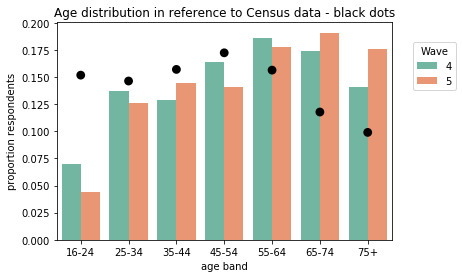

In [164]:
### AGE 

x, y, hue = "age_dv", "proportion", "surveyyear"
hue_order = ["1", "2", "3", "4", "5"]

g = (fnu_select[x]
 .groupby(fnu_select[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ci="sd", palette="Set2", zorder=0))
     
g = sns.pointplot (x="index", y="age_dv", data=census_select['age_dv'].value_counts(normalize=True).reset_index(), 
                   join=False, color='black', zorder=100,  height=10, aspect=1.5)

g.legend(title='Wave', loc='center left', bbox_to_anchor=(1.05, 0.8))
g.set(xlabel='age band', ylabel='proportion respondents', 
      title = 'Age distribution in reference to Census data - black dots')

g.set_xticklabels({"16-24":1, "25-34":2, "35-44":3, "45-54":4, "55-64":5, "65-74":6, "75+":7})

figure = g.get_figure()   
figure.savefig('age_distrib.png', dpi=200, bbox_inches='tight')

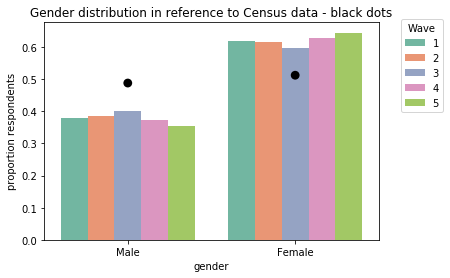

In [161]:
### GENDER

x, y, hue = "RespSex", "proportion", "surveyyear"

g = (fnu_select[x]
 .groupby(fnu_select[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ci="sd", palette="Set2", zorder=0))
     
g = sns.pointplot (x="index", y="sex", data=census_select['sex'].value_counts(normalize=True).reset_index(), 
                   join=False, color='black', zorder=100,  height=10, aspect=2)

g.legend(title='Wave', loc='center left', bbox_to_anchor=(1.05, 0.8))
g.set(xlabel='gender', ylabel='proportion respondents', 
      title = 'Gender distribution in reference to Census data - black dots')

g.set_xticklabels({"Male":1, "Female":2})

figure = g.get_figure()   
figure.savefig('gender_distrib.png', dpi=200, bbox_inches='tight')

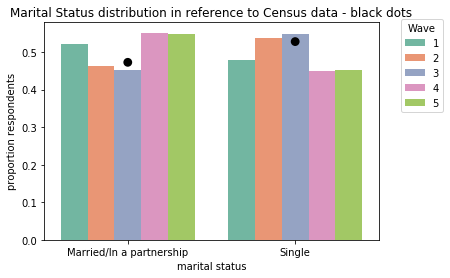

In [160]:
### MARITAL STATUS

x, y, hue = "marstat2", "proportion", "surveyyear"


g = (fnu_select[x]
 .groupby(fnu_select[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ci="sd", palette="Set2", zorder=0))
     
g = sns.pointplot (x="index", y="marstat2", data=census_select['marstat2'].value_counts(normalize=True).reset_index(), 
                   join=False, color='black', zorder=100,  height=10, aspect=2)

g.legend(title='Wave', loc='center left', bbox_to_anchor=(1.05, 0.8))
g.set(xlabel='marital status', ylabel='proportion respondents', 
      title = 'Marital Status distribution in reference to Census data - black dots')

g.set_xticklabels({"Married/In a partnership":1, "Single":2})

figure = g.get_figure()   
figure.savefig('marstat_distrib.png', dpi=200, bbox_inches='tight')

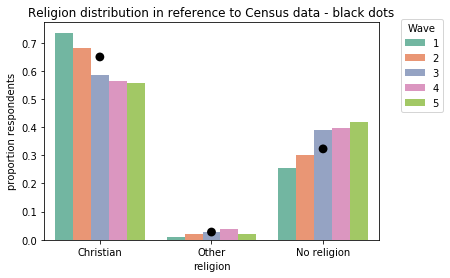

In [159]:
### RELIGION

x, y, hue = "religion_dv", "proportion", "surveyyear"

g = (fnu_select[x]
 .groupby(fnu_select[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ci="sd", palette="Set2", zorder=0))
     
g = sns.pointplot (x="index", y="religion_dv", data=census_select['religion_dv'].value_counts(normalize=True).reset_index(), 
                   join=False, color='black', zorder=100,  height=10, aspect=2)

g.legend(title='Wave', loc='center left', bbox_to_anchor=(1.05, 0.8))
g.set(xlabel='religion', ylabel='proportion respondents', 
      title = 'Religion distribution in reference to Census data - black dots')

g.set_xticklabels({"Christian":1, "Other":2, "No religion":3})

figure = g.get_figure()   
figure.savefig('religion_distrib.png', dpi=200, bbox_inches='tight')

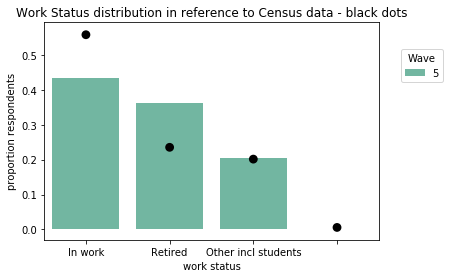

In [7]:
### WORK STATUS

x, y, hue = "workstat2", "proportion", "surveyyear"

g = (fnu_select[x]
 .groupby(fnu_select[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ci="sd", palette="Set2", zorder=0))
     
g = sns.pointplot (x="index", y="workstat2", data=census_select['workstat2'].value_counts(normalize=True).reset_index(), 
                   join=False, color='black', zorder=100,  height=10, aspect=2)

g.legend(title='Wave', loc='center left', bbox_to_anchor=(1.05, 0.8))
g.set(xlabel='work status', ylabel='proportion respondents', 
      title = 'Work Status distribution in reference to Census data - black dots')

g.set_xticklabels({"In work":1, "Retired":2, "Other incl students":3})

figure = g.get_figure()   
figure.savefig('workstat_distrib.png', dpi=200, bbox_inches='tight')

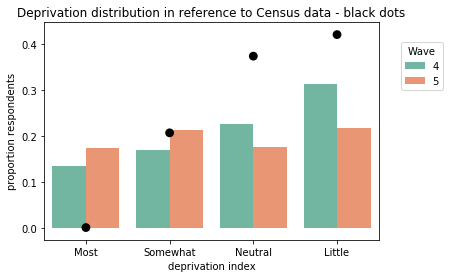

In [11]:
### DEPRIVATION

x, y, hue = "wimd_2014_quintile", "proportion", "surveyyear"

g = (fnu_select[x]
 .groupby(fnu_select[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ci="sd", palette="Set2", zorder=0))
     
g = sns.pointplot (x="index", y="wimd_2014_quintile", data=census_select['wimd_2014_quintile'].value_counts(normalize=True).reset_index(), 
                   join=False, color='black', zorder=100,  height=10, aspect=3)

g.legend(title='Wave', loc='center left', bbox_to_anchor=(1.05, 0.8))
g.set(xlabel='deprivation index', ylabel='proportion respondents', 
      title = 'Deprivation distribution in reference to Census data - black dots')

g.set_xticklabels({"Most":1, "Somewhat":2, "Neutral":3, "Little":4, "Least":5})

figure = g.get_figure()   
figure.savefig('deprivation_distrib.png', dpi=200, bbox_inches='tight')

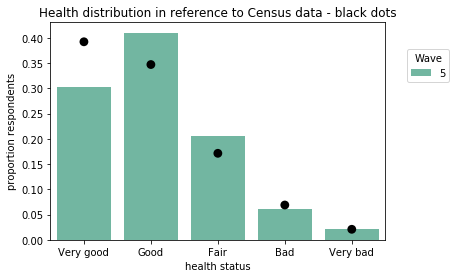

In [10]:
### HEALTH

x, y, hue = "Q6_1", "proportion", "surveyyear"

g = (fnu_select[x]
 .groupby(fnu_select[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ci="sd", palette="Set2", zorder=0))
     
g = sns.pointplot (x="index", y="Q6_1", data=census_select['Q6_1'].value_counts(normalize=True).reset_index(), 
                   join=False, color='black', zorder=100,  height=10, aspect=2)

g.legend(title='Wave', loc='center left', bbox_to_anchor=(1.05, 0.8))
g.set(xlabel='health status', ylabel='proportion respondents', 
      title = 'Health distribution in reference to Census data - black dots')

g.set_xticklabels({"Very good":1, "Good":2, "Fair":3, "Bad":4, "Very bad":5})

figure = g.get_figure()   
figure.savefig('health_distrib.png', dpi=200, bbox_inches='tight')